# Lasso Regression

Lasso Regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. Lasso stands for Least Absolute Shrinkage and Selection Operator. The primary goal of Lasso regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes Lasso particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

## Uses of Lasso Regression
Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage, where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination. Lasso Regression uses L1 regularization technique. It is used when we have more features because it automatically performs feature selection.

## Examples of Lasso Regression
Here are some examples of lasso regression in real life:
1. **Analysis of Genomic Data**: When the number of predictor variables is much larger than the number of observations, you’ll want to choose Lasso regression over multiple linear regression. This is very typical of genomic data. With genomic data, each individual has tens of 1,000’s of genes.
2. **Group Lasso**: In some contexts, we may wish to treat a set of regressors as a group, for example, when we have a categorical covariate with more than two levels. The grouped lasso addresses this problem by considering the simultaneous shrinkage of (pre-defined) groups of coefficients.

As a data scientist, understanding lasso regression is crucial as it provides a strong foundation for understanding more complex machine learning algorithms. It's also a powerful tool in its own right for making predictions based on a set of related data points. It's particularly useful when dealing with multicollinearity in your data, where two or more predictor variables are highly correlated.

# Лассо-регрессия

Лассо-регрессия, также известная как L1-регуляризация, - это популярная техника, используемая в статистическом моделировании и машинном обучении для оценки связей между переменными и прогнозирования. Lasso - это аббревиатура от Least Absolute Shrinkage and Selection Operator (оператор наименьшего абсолютного сжатия и выбора). Основная цель лассо-регрессии - найти баланс между простотой модели и точностью. Она достигает этого, добавляя штрафной член к традиционной модели линейной регрессии, который стимулирует разреженные решения, где некоторые коэффициенты вынуждены быть строго равными нулю. Эта особенность делает Lasso особенно полезным для выбора признаков, поскольку он может автоматически определить и отбросить нерелевантные или избыточные переменные.

## Применение лассо-регрессии
Лассо-регрессия - это техника регуляризации. Она используется вместо методов регрессии для более точного прогнозирования. Эта модель использует сжатие, где значения данных сжимаются к центральной точке, такой как среднее значение. Процедура лассо-регрессии стимулирует простые, разреженные модели (то есть модели с меньшим количеством параметров). Этот конкретный тип регрессии хорошо подходит для моделей, показывающих высокий уровень мультиколлинеарности, или когда вы хотите автоматизировать определенные части выбора модели, такие как выбор переменных / исключение параметров. Лассо-регрессия использует технику регуляризации L1. Она используется, когда у нас много признаков, потому что она автоматически выполняет выбор признаков.

## Примеры лассо-регрессии
Вот несколько примеров лассо-регрессии в реальной жизни:

1. **Анализ геномных данных**: Когда количество предикторных переменных значительно больше, чем количество наблюдений, вы захотите выбрать лассо-регрессию вместо множественной линейной регрессии. Это очень типично для геномных данных. У каждого человека десятки тысяч генов.
2. **Групповая лассо-регрессия**: В некоторых контекстах мы можем захотеть рассматривать набор регрессоров как группу, например, когда у нас есть категориальная ковариатная переменная с более чем двумя уровнями. Групповая лассо-регрессия решает эту проблему, рассматривая одновременное сжатие (предварительно определенных) групп коэффициентов.

Для специалиста по данным понимание лассо-регрессии имеет решающее значение, поскольку оно обеспечивает прочную основу для понимания более сложных алгоритмов машинного обучения. Это также мощный инструмент сам по себе для прогнозирования на основе набора связанных точек данных. Он особенно полезен при работе с мультиколлинеарностью в ваших данных, где две или более предикторных переменных сильно коррелированы.

Epoch 0, Loss: 376.2478332519531
Epoch 100, Loss: 32.40439987182617
Epoch 200, Loss: 26.34731101989746
Epoch 300, Loss: 26.240550994873047
Epoch 400, Loss: 26.238664627075195
Epoch 500, Loss: 26.23863410949707
Epoch 600, Loss: 26.23863410949707
Epoch 700, Loss: 26.238632202148438
Epoch 800, Loss: 26.238632202148438
Epoch 900, Loss: 26.238632202148438


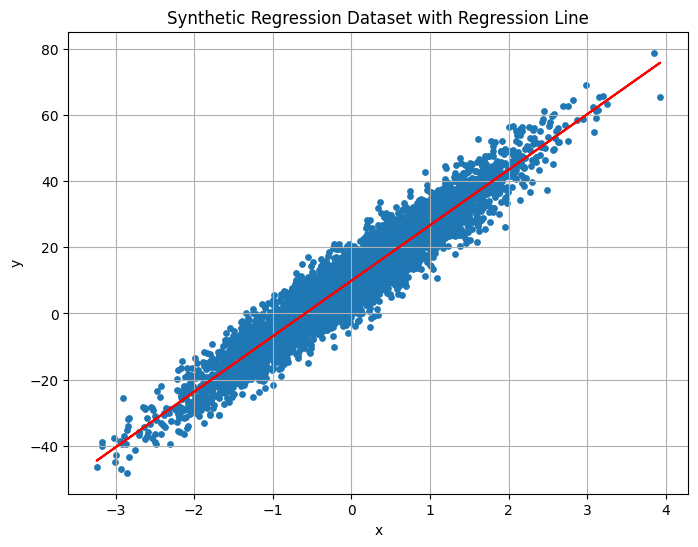

In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

class LassoRegressionModel:
    def __init__(self, n_samples=5000, n_features=1, n_targets=1, noise=5, bias=10, l1_penalty=0.01):
        """
        Initialize the LassoRegressionModel with a synthetic dataset.

        Parameters:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_targets (int): The number of targets.
        noise (float): The standard deviation of the Gaussian noise applied to the output.
        bias (float): The bias term in the underlying linear model.
        l1_penalty (float): The L1 penalty term for the Lasso regression.
        """
        X_numpy, y_numpy, _ = make_regression(
            n_samples=n_samples,
            n_features=n_features,
            n_targets=n_targets,
            noise=noise,
            bias=bias,
            coef=True,
            random_state=42
        )
        self.X = torch.tensor(X_numpy, dtype=torch.float32)
        self.y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)
        self.model = nn.Linear(self.X.shape[1], self.y.shape[1])
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.01)
        self.l1_penalty = l1_penalty

    def train(self, epochs=1000):
        """
        Train the model for a number of epochs.

        Parameters:
        epochs (int): The number of epochs to train the model.
        """
        for epoch in range(epochs):
            y_pred = self.model(self.X)
            loss = self.criterion(y_pred, self.y)
            l1_norm = sum(p.abs().sum() for p in self.model.parameters())
            loss += self.l1_penalty * l1_norm
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.item()}')
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

    def plot(self):
        """
        Plot the dataset and the learned regression line.
        """
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X.numpy(), self.y.numpy(), s=15)
        plt.plot(self.X.numpy(), self.model(self.X).data.numpy(), color='red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Synthetic Regression Dataset with Regression Line')
        plt.grid(True)
        plt.show()

# Usage:
lr = LassoRegressionModel()
lr.train()
lr.plot()